In [23]:
import pandas as pd
import numpy as np

In [24]:
df_survey = pd.read_csv('https://cocl.us/datascience_survey_data', index_col=0)

In [25]:
df_survey

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [26]:
df_survey.shape

(6, 3)

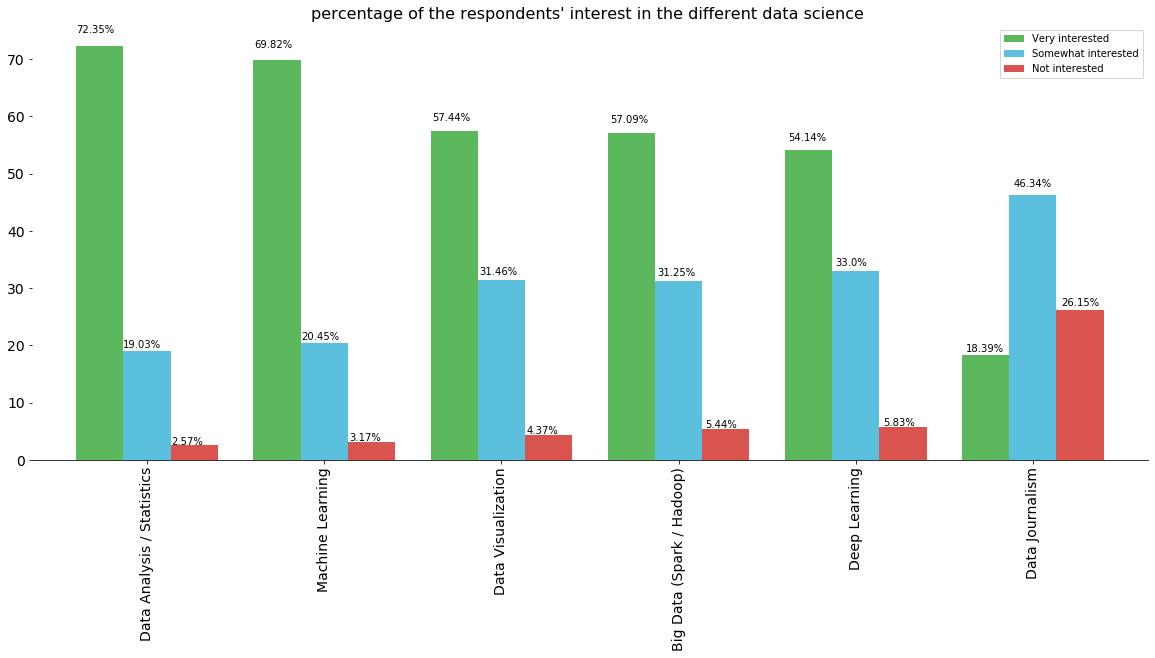

In [13]:
import matplotlib
import matplotlib as plt

# #sorting Very interested according 
df_survey_sort = df_survey.sort_values('Very interested', ascending=False)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# #Convert the numbers into percentages of the total number of respondents.Round percentages to 2 decimal places.
df_survey_sort = ((df_survey_sort/2333)*100).round(2)

ax = df_survey_sort.plot( 
    kind = 'bar', 
    figsize = (20,8), 
    color = ['#5cb85c', '#5bc0de', '#d9534f'], 
    fontsize = 14, 
    width = 0.8)
ax.set_title("percentage of the respondents' interest in the different data science ", fontsize=16)
ax.set_facecolor((1.0, 1.0, 1.0))
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.03))

# Remove x,y Ticks
# ax.xaxis.set_ticks_position('none')
# ax.yaxis.set_ticks_position('none')

# Remove axes splines
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)

In [7]:
df_survey_sort

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,72.35,19.03,2.57
Machine Learning,69.82,20.45,3.17
Data Visualization,57.44,31.46,4.37
Big Data (Spark / Hadoop),57.09,31.25,5.44
Deep Learning,54.14,33.00,5.83
Data Journalism,18.39,46.34,26.15


In [8]:
df_san = pd.read_csv("https://cocl.us/sanfran_crime_dataset")

In [9]:
df_san.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [10]:
df_san.shape

(150500, 13)

In [11]:
df_temp = df_san.groupby(['PdDistrict']).count().reset_index()
df_temp.drop(['Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'], axis=1, inplace = True)
df_temp.rename(columns = {'PdDistrict':'Neighborhood', 'IncidntNum':'Count'}, inplace = True)

In [45]:
df_temp

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [29]:
# download countries geojson file
!wget --quiet https://cocl.us/sanfran_geojson -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [41]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

# All requested packages already installed.



In [44]:
print('Folium installed and imported!')
world_geo = r'world_countries.json' # geojson file
df_temp
# create a plain world map
# world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

Folium installed and imported!


,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [46]:
world_geo = r'world_countries.json'

# let Folium determine the scale.
world_map = folium.Map(location=[37.773972, -122.431297], zoom_start=12)
world_map.choropleth(
    geo_data=world_geo,
    data=df_temp,
    columns=['Neighborhood', 'Count'],
    key_on='features.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
)
world_map


AttributeError: 'NoneType' object has no attribute 'get'

In [ ]:

sf_geo = r'sanfran_geo.json' # geojson file

# create a plain San Francisco map
sf_map = folium.Map(location=[37.773972, -122.431297], zoom_start=12) #, tiles='Mapbox Bright')
sf_map.choropleth(
    geo_data=sf_geo,
    data=df_tmp,
    columns=['Neighborhood','Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='San Francisco Crimes'
)

# display map
sf_map